In [3]:
import glob
import csv
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import collections
import requests
import os
import io
import zipfile
import datetime
import time 
from datetime import datetime

In [4]:
filepaths = ['../data/sales/sales_2019_data_mart.csv', 
             '../data/sales/sales_2018_data_mart.csv', 
             '../data/sales/sales_2017_data_mart.csv',
             '../data/sales/sales_2016_data_mart.csv',
             '../data/sales/sales_2015_data_mart.csv',
             '../data/sales/sales_2014_data_mart.csv',
             #'../data/sales/sales_2013_data_mart.csv',
             #'../data/sales/sales_2012_data_mart.csv',
             #'../data/sales/sales_2011_data_mart.csv',
             #'../data/sales/sales_2010_data_mart.csv'
            ]
df_read = pd.concat(map(pd.read_csv, filepaths))
df_time_ser_price = df_read.drop_duplicates(subset=[i for i in df_read.columns], keep=False)
df_time_ser_price['Settlement_Date_f'] = pd.to_datetime(df_time_ser_price['Settlement_Date_f']) 
print(len(df_time_ser_price))
print(df_time_ser_price.dtypes)
df_time_ser_price.head(1)

399416
Settlement_Date_f                 datetime64[ns]
Property_Locality                         object
Property_Post_Code                       float64
Property_Price_Sq_Meter_mean             float64
Property_Price_Sq_Meter_count              int64
Property_Price_Sq_Meter_min              float64
Property_Price_Sq_Meter_max              float64
Property_Price_Sq_Meter_median           float64
Property_Price_Sq_Meter_std              float64
dtype: object


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Settlement_Date_f,Property_Locality,Property_Post_Code,Property_Price_Sq_Meter_mean,Property_Price_Sq_Meter_count,Property_Price_Sq_Meter_min,Property_Price_Sq_Meter_max,Property_Price_Sq_Meter_median,Property_Price_Sq_Meter_std
0,2010-11-01,SHELLCOVE,2529.0,210.345902,1,210.345902,210.345902,210.345902,NaN


In [5]:
df_time_ser_price.head()

,Settlement_Date_f,Property_Locality,Property_Post_Code,Property_Price_Sq_Meter_mean,Property_Price_Sq_Meter_count,Property_Price_Sq_Meter_min,Property_Price_Sq_Meter_max,Property_Price_Sq_Meter_median,Property_Price_Sq_Meter_std
0,2010-11-01,SHELLCOVE,2529.0,210.345902,1,210.345902,210.345902,210.345902,NaN
1,2016-09-07,LIGHTNINGRIDGE,2834.0,2.134472,1,2.134472,2.134472,2.134472,NaN
2,2017-06-06,NORTHWAHROONGA,2076.0,6.374666,1,6.374666,6.374666,6.374666,NaN
3,2017-08-18,DARBYSFALLS,2793.0,59.830160,1,59.830160,59.830160,59.830160,NaN
4,2017-10-11,EUCUMBENE,2628.0,0.843028,1,0.843028,0.843028,0.843028,NaN


In [6]:
df_time_ser_price.Settlement_Date_f.max()

Timestamp('2019-01-17 00:00:00')

In [7]:
df_time_ser_price[(df_time_ser_price.Settlement_Date_f>="2017-01-01") & 
                  (df_time_ser_price.Settlement_Date_f<="2017-01-05") &
                  (df_time_ser_price.Property_Locality=="QUAKERSHILL")]

,Settlement_Date_f,Property_Locality,Property_Post_Code,Property_Price_Sq_Meter_mean,Property_Price_Sq_Meter_count,Property_Price_Sq_Meter_min,Property_Price_Sq_Meter_max,Property_Price_Sq_Meter_median,Property_Price_Sq_Meter_std


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

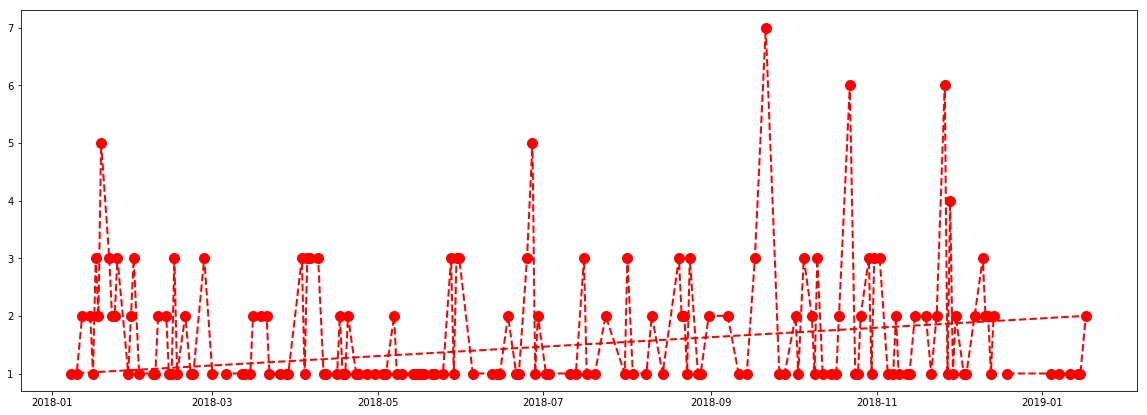

In [10]:
plt.figure(figsize=(20,7))
my_df = df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL") &
                          (df_time_ser_price.Settlement_Date_f>="2018-01-01")
                         ]

plt.plot_date(x = my_df["Settlement_Date_f"], 
         y= my_df['Property_Price_Sq_Meter_count'], 
         color='red', 
         marker='o', 
         linestyle='dashed', 
         linewidth=2, 
         markersize=10,
         label = df_time_ser_price['Property_Locality']
        )
plt

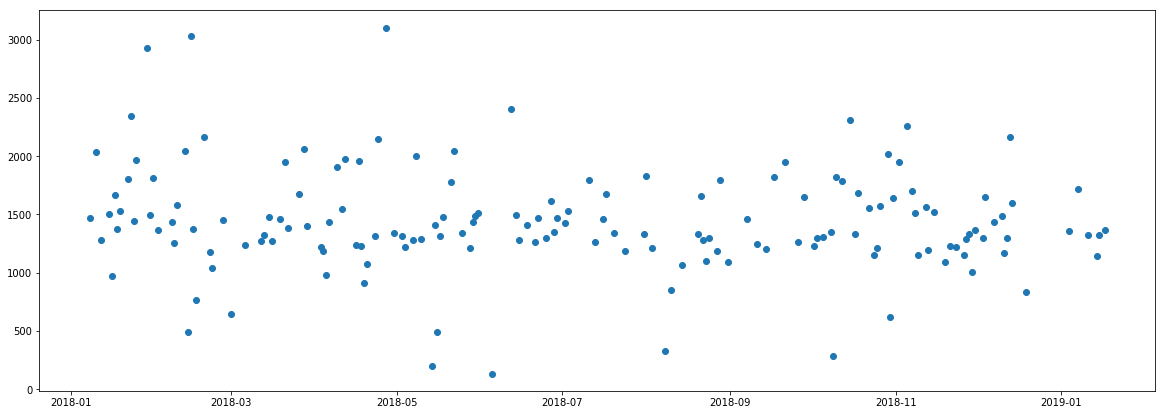

In [11]:

plt.figure(figsize=(20,7))
plt.plot( 'Settlement_Date_f', 'Property_Price_Sq_Meter_mean', 
         data=my_df[['Settlement_Date_f','Property_Price_Sq_Meter_mean']], 
         linestyle='none', 
         marker='o')
plt.show()


In [14]:
import datetime
df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL") &
                          (df_time_ser_price.Settlement_Date_f >= datetime.datetime(2015,6,1)) &  
                          (df_time_ser_price.Settlement_Date_f <= datetime.datetime(2015,12,31)) 
                         ]

,Settlement_Date_f,Property_Locality,Property_Post_Code,Property_Price_Sq_Meter_mean,Property_Price_Sq_Meter_count,Property_Price_Sq_Meter_min,Property_Price_Sq_Meter_max,Property_Price_Sq_Meter_median,Property_Price_Sq_Meter_std
278,2015-07-29,QUAKERSHILL,2763.0,1923.076923,1,1923.076923,1923.076923,1923.076923,NaN
1550,2015-12-01,QUAKERSHILL,2763.0,1075.076151,1,1075.076151,1075.076151,1075.076151,NaN
2259,2015-12-10,QUAKERSHILL,2763.0,1451.555556,1,1451.555556,1451.555556,1451.555556,NaN
2506,2015-12-11,QUAKERSHILL,2763.0,1244.958794,1,1244.958794,1244.958794,1244.958794,NaN
3391,2015-12-16,QUAKERSHILL,2763.0,1287.957907,2,1026.432309,1549.483505,1287.957907,369.853048
3769,2015-12-17,QUAKERSHILL,2763.0,1009.287362,3,224.865880,1713.241617,1089.754591,747.443519
5049,2015-12-21,QUAKERSHILL,2763.0,1479.618640,3,1111.111111,2139.198554,1188.546256,572.523622
5522,2015-12-22,QUAKERSHILL,2763.0,2324.324324,1,2324.324324,2324.324324,2324.324324,NaN
5859,2015-12-23,QUAKERSHILL,2763.0,1332.655137,1,1332.655137,1332.655137,1332.655137,NaN
39211,2015-06-01,QUAKERSHILL,2763.0,1363.047485,3,1316.672258,1439.363005,1333.107191,66.600081


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

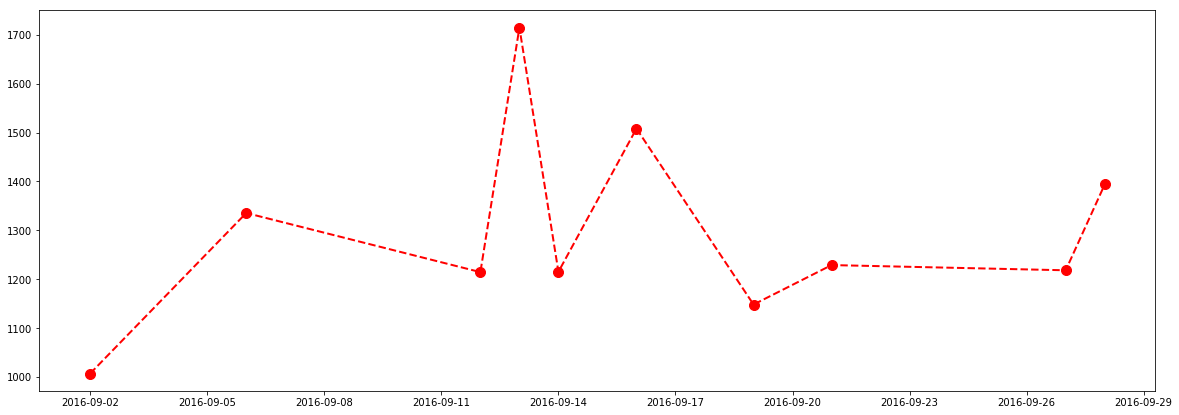

In [17]:
plt.figure(figsize=(20,7))
my_df = df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL") &
                          (df_time_ser_price.Settlement_Date_f < "2016-09-30") &  
                          (df_time_ser_price.Settlement_Date_f > "2016-09-01") 
                         ]

plt.plot_date(x = my_df["Settlement_Date_f"], 
         y= my_df['Property_Price_Sq_Meter_mean'], 
         color='red', 
         marker='o', 
         linestyle='dashed', 
         linewidth=2, 
         markersize=10,
         label = df_time_ser_price['Property_Locality']
        )
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

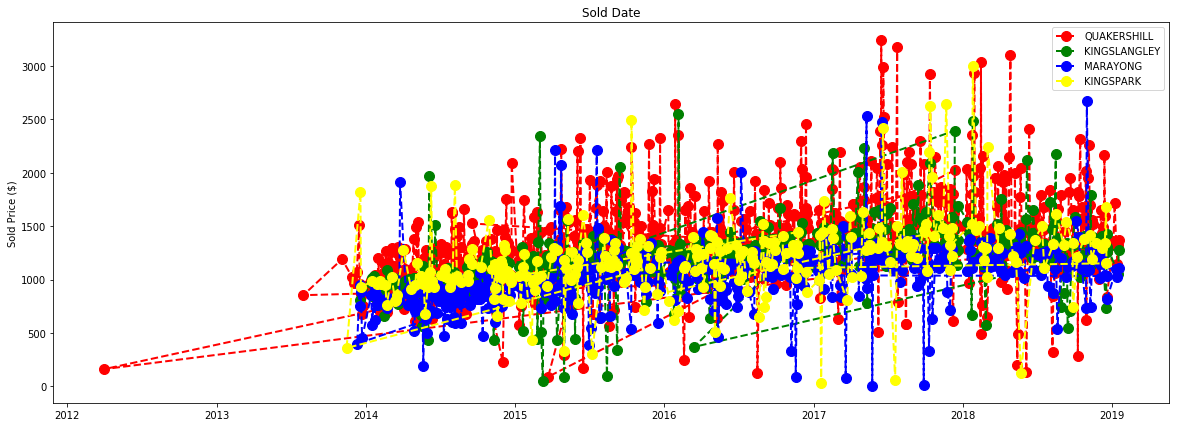

In [19]:
plt.figure(figsize=(20,7))
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]["Settlement_Date_f"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]['Property_Price_Sq_Meter_mean'], 
         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'QUAKERSHILL')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]["Settlement_Date_f"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]['Property_Price_Sq_Meter_mean'], 
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSLANGLEY')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["Settlement_Date_f"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['Property_Price_Sq_Meter_mean'], 
         color='Blue', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'MARAYONG')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]["Settlement_Date_f"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]['Property_Price_Sq_Meter_mean'], 
         color='Yellow', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSPARK')





plt.ylabel('Sold Price ($)') 
plt.title('Sold Date')
plt.legend();
plt

In [20]:
plt.figure(figsize=(20,7))
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]["Download_Date"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="QUAKERSHILL")]['Purchase_Price_count'], 
         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'QUAKERSHILL')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]["Download_Date"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSLANGLEY")]['Purchase_Price_count'], 
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSLANGLEY')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]["Download_Date"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="KINGSPARK")]['Purchase_Price_count'], 
         color='Yellow', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'KINGSPARK')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["Download_Date"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['Purchase_Price_count'], 
         color='Black', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'GLENWOOD')
plt.plot(df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]["Download_Date"], 
         df_time_ser_price[(df_time_ser_price.Property_Locality=="MARAYONG")]['Purchase_Price_count'], 
         color='Blue', marker='o', linestyle='dashed', linewidth=2, markersize=10,
         label = 'MARAYONG')



plt.ylabel('Sold Count ($)') 
plt.title('Sold Date')
plt.legend();
plt

KeyError: 'Purchase_Price_count'

<Figure size 1440x504 with 0 Axes>